# tRAT 2

---
---

**Author:** Dr Giordano Scarciotti (g.scarciotti@imperial.ac.uk) - Imperial College London

**Module:** ELEC70066 - Applied Advanced Optimisation

**Version:** 1.1.2 - 23/01/2025

---
---

## IMPORTANT: Write the number of your group here:

# Exercise 1

Copy this file in your drive, write your solution, download your solved file as .ipynb and submit it to Blackboard.

Consider a random variable $X$ with values in the finite set $\{\alpha_1,\dots,\alpha_n\}$. The distribution of $X$ is characterized by $p$, as $\textbf{prob}(X=\alpha_k)=p_k$. Clearly $p$ satisfies $p\succeq 0$, $\mathbf{1}^\top p=1$.

The so-called *Maximum Entropy Distribution problem with prior assumptions* can be formulated as

$$
\begin{array}{ll}
\displaystyle \max_{p} & -\sum_{i=1}^n p_i \log(p_i)\\
s.t. & p \in \mathcal{P}.
\end{array}
$$

where $\mathcal{P}$ represents a convex set expressing prior information.

We consider a set of equidistant points $\alpha_i$ in the interval $[-1,1]$:

In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

#Data
n = 100
alpha = np.linspace(-1,1,n)

And we assume the following prior information:

$$
E(X) \in [-0.1,0.1]
$$
$$
E(X^2) \in [0.5,0.6]
$$
$$
E(3X^3-2X) \in [-0.3,-0.2]
$$
$$
\textbf{prob}(X<0) \in [0.3,0.4]
$$

Recall that $E(f(X)) = \sum_{i} f(\alpha_i) \cdot p_i$ and that $\textbf{prob}(X< 0)$ is given by the Python command `(alpha<0).astype(int)*p`, where `p` is the cp variable.

1.   Solve the Maximum Entropy Distribution problem with prior information (Hint: it is advised that you use the atomic function [entr](https://www.cvxpy.org/api_reference/cvxpy.atoms.elementwise.html?highlight=entr#cvxpy.atoms.elementwise.entr.entr)). What is the optimal value?
2.   Plot $\textbf{prob}(X = \alpha_i)$ vs $\alpha_i$.

In [ ]:
p = cp.Variable(n)

constraints = [
    p >= 0, 
    cp.sum(p) == 1, 
    cp.sum(alpha @ p) >= -0.1, 
    cp.sum(alpha @ p) <= 0.1, 
    cp.sum(alpha**2 @ p) >= 0.5, 
    cp.sum(alpha**2 @ p) <= 0.6, 
    cp.sum((3*alpha**3 - 2*alpha) @ p) >= -0.3, 
    cp.sum((3*alpha**3 - 2*alpha) @ p) <= -0.2,
    cp.sum((alpha < 0).astype(int)@ p) >= 0.3, 
    cp.sum((alpha < 0).astype(int)@ p) <= 0.4  
]

problem = cp.Problem(cp.Maximize(cp.sum(cp.entr(p))), constraints)
solution = problem.solve()

print(problem.value)
print(p.value)

4.386294333841988
[0.04195095 0.03539138 0.03005836 0.02570215 0.02211985 0.01916517
 0.01670235 0.01465158 0.0129299  0.01147916 0.01025295 0.00920856
 0.00832018 0.00755722 0.00690202 0.00633758 0.00584972 0.00542721
 0.0050581  0.00473987 0.00446284 0.0042211  0.00400994 0.00382563
 0.00366795 0.0035299  0.00341152 0.00330982 0.00322402 0.00315203
 0.00309325 0.00304648 0.00300971 0.002984   0.00296717 0.00296041
 0.00296195 0.00297289 0.00299109 0.0030177  0.00305234 0.00309469
 0.00314497 0.00320297 0.00326881 0.00334254 0.00342472 0.00351401
 0.00361243 0.00371886 0.00548945 0.00566521 0.00585568 0.00605824
 0.00627353 0.00650304 0.00674555 0.00700081 0.00727019 0.00755057
 0.00784683 0.0081553  0.00847571 0.0088095  0.00915433 0.00950999
 0.00987579 0.01025024 0.01063365 0.01102126 0.01141574 0.01181209
 0.01220937 0.01260416 0.0129982  0.01338113 0.0137557  0.01412231
 0.01447003 0.01480085 0.01510893 0.01539045 0.01564757 0.01586658
 0.01605348 0.01620061 0.01630425 0.01636751

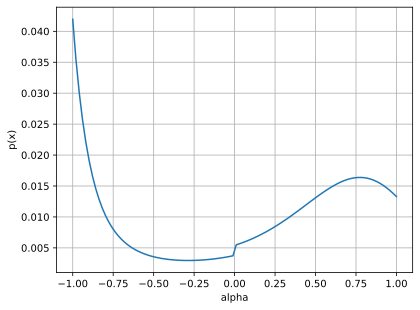

In [35]:
import matplotlib.pyplot as plt

plt.plot(alpha, p.value, )
plt.xlabel('alpha')
plt.ylabel('p(x)')
plt.grid(True)
plt.show()

# Exercise 2

You can submit the solution of this exercise either as .ipynb, or on a piece of paper.

Recall that a set $C$ is convex if for any $x_1,x_2\in C$ and any $\theta$ such that $0\le \theta \le 1$ we have

$$
\theta x_1 + (1-\theta) x_2 \in C
$$

Using the definition above prove that the probability simplex, i.e. the set of vectors that satisfy $x \succeq 0$, $\mathbf{1}^\top x = 1$, is convex.

---

# Feedback

Dear Group 6,

The feedback of your tRAT follows:
Exercise 1:
-    The solution of the optimal value has the wrong sign. You reformulated the problem as a maximization but forgot to change the sign of the optimal value at the end.
-    (no penalty) As the multiplication, e.g., ‘p @ alpha’ is already a scalar, there is no need to use cp.sum() when constructing the constraints.
-    (no penalty) The code produces a lot of warnings due to vector-vector multiplication done with *. As the warning suggests it is enough to replace * with @ to sort the issue.
Exercise 2 is OK.


A complete solution is available on Blackboard in the "tRAT" folder. 

Your tRAT grade is A (if you were present).